# 다양체 학습 (Manifold Learning)

* 높은 차원의 데이터를 ***저차원***으로 **축소**하는 방법

![manifold](https://scikit-learn.org/stable/_images/sphx_glr_plot_compare_methods_0011.png)

* 고차원 데이터를 2차원 또는 3차원으로 축소해 시각화에 활용할 수 있음
* 차원 축소 과정에서 중요하지 않은 정보는 버려지고 중요한 정보만 남기 때문에 ***데이터 정제***에 활용 가능

## 데이터 생성 및 시각화 함수

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

from sklearn import manifold
from sklearn import random_projection
from sklearn import datasets

In [2]:
s_curve, color = datasets.make_s_curve(1000, random_state = 0)

In [4]:
digits, labels = datasets.load_digits(return_X_y = True)
rand_proj = random_projection.SparseRandomProjection(n_components = 3, random_state = 0)
projected_digits = rand_proj.fit_transform(digits)

In [5]:
def min_max_scale(x):
    min_value, max_value = np.min(x, 0), np.max(x, 0)
    x = (x - min_value) / (max_value - min_value)
    return x

In [11]:
def plot_s_curve(s_curve, color, position, projection):
    s_curve = min_max_scale(s_curve)
    # 3차원일경우
    if projection == '3d':
        ax = plt.subplot(position, projection = projection)
        ax.scatter(s_curve[:, 0], s_curve[:, 1], s_curve[:, 2], c = color, cmap = plt.cm.Spectral)
        ax.view_init(4, -72)
    # 2차원일경우
    elif projection == '2d':
        ax = plt.subplot(position)
        ax.scatter(s_curve[:, 0], s_curve[:, 1], c = color, cmap = plt.cm.Spectral)

In [7]:
def plot_digits(digits, labels, position, projection):
    digits = min_max_scale(digits)
    if projection == '3d':
        ax = plt.subplot(position, projection = projection)
        for i in range(digits.shape[0]):
            ax.text(digits[i, 0], digits[i, 1], digits[i, 2], str(labels[i]), color = plt.cm.Set1(labels[i] / 10.), 
                   fontdict = {'weight': 'bold', 'size': 9})
        ax.view_init(4, -72)
    elif projection == '2d':
        ax = plt.subplot(position)
        for i in range(digits.shape[0]):
            ax.text(digits[i, 0], digits[i, 1], str(labels[i]), color = plt.cm.Set1(labels[i] / 10.), 
                   fontdict = {'weight': 'bold', 'size': 9})

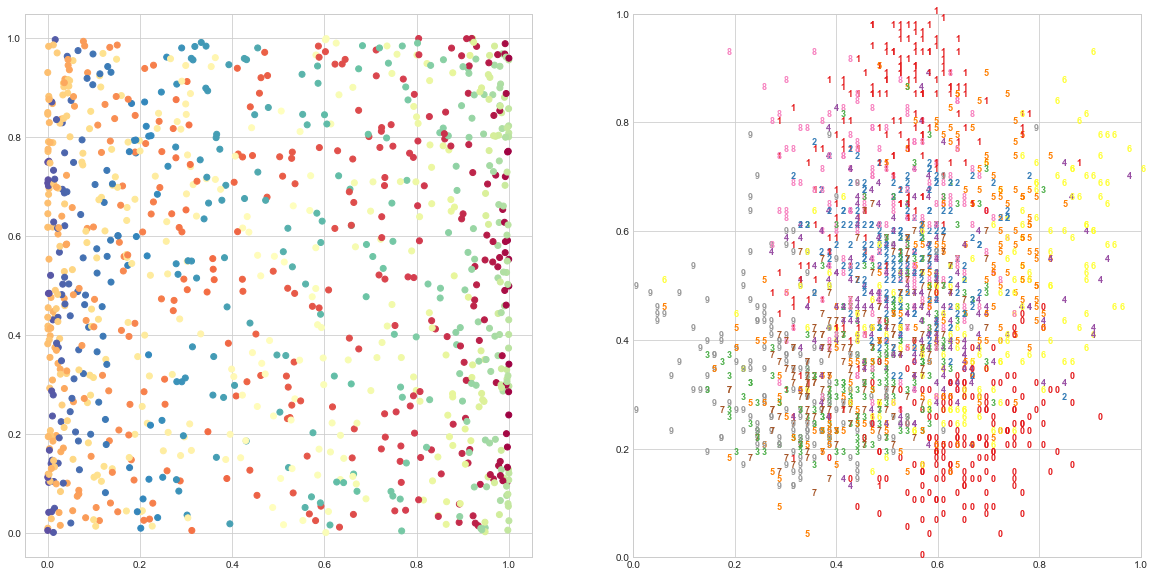

In [18]:
fig = plt.figure(figsize = (20, 10))
plot_s_curve(s_curve, color, 121, '2d')
plot_digits(projected_digits, labels, 122, '2d')

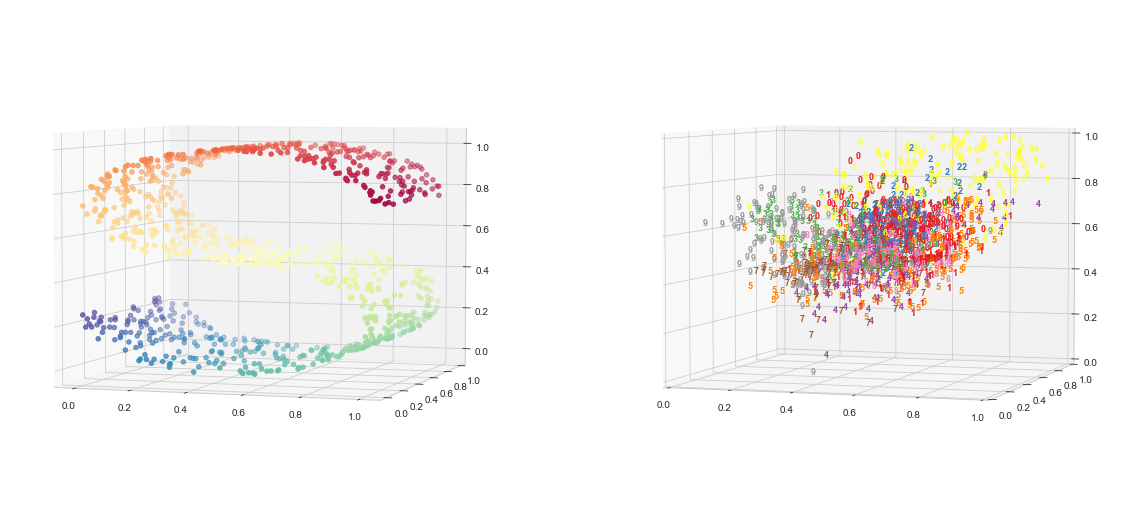

In [13]:
fig = plt.figure(figsize = (20, 10))
plot_s_curve(s_curve, color, 121, '3d')
plot_digits(projected_digits, labels, 122, '3d')

## Locally Linear Embedding (LLE)

* 국소 이웃 거리를 보존하는 저차원 임베딩을 찾음

In [14]:
s_curve_lle = manifold.LocallyLinearEmbedding(n_neighbors = 30, n_components = 2, method = 'standard', 
                                              random_state = 0).fit_transform(s_curve)
digits_lle = manifold.LocallyLinearEmbedding(n_neighbors = 30, n_components = 3, method = 'standard',
                                            random_state = 0).fit_transform(digits)

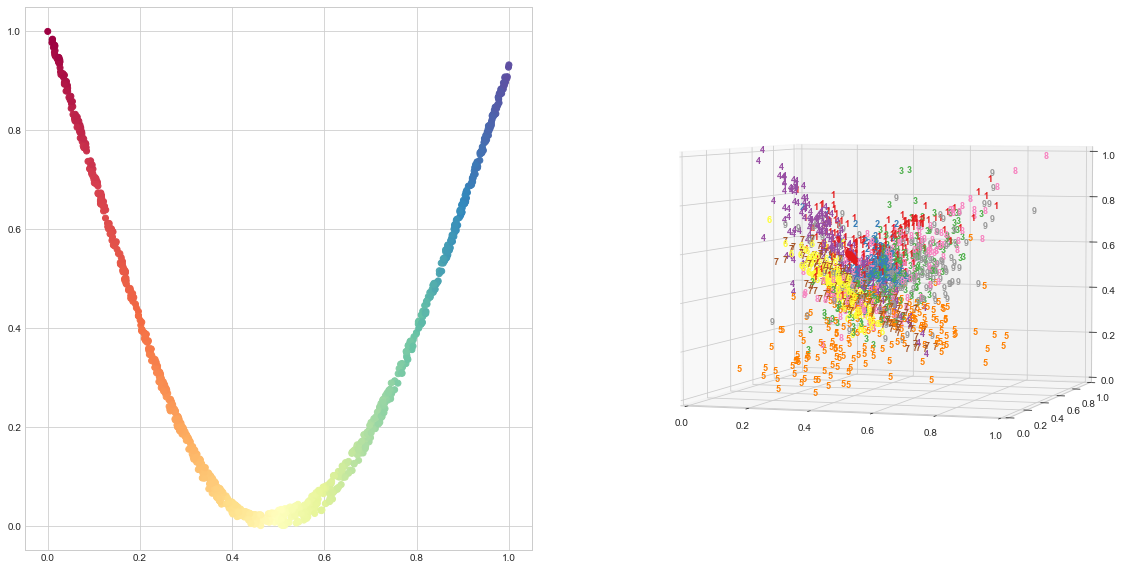

In [15]:
fig = plt.figure(figsize = (20, 10))
plot_s_curve(s_curve_lle, color, 121, '2d')
plot_digits(digits_lle, labels, 122, '3d')

## Local Tangent Space Alignment (LTSA)

* 탄젠트 공간을 통해 각 이웃의 국소 성질을 특성화
* 국소 탄젠트 공간을 정렬

In [16]:
s_curve_ltsa = manifold.LocallyLinearEmbedding(n_neighbors = 30, n_components = 2, method = 'ltsa', 
                                              random_state = 0).fit_transform(s_curve)
digits_ltsa = manifold.LocallyLinearEmbedding(n_neighbors = 30, n_components = 3, method = 'ltsa',
                                            random_state = 0).fit_transform(digits)

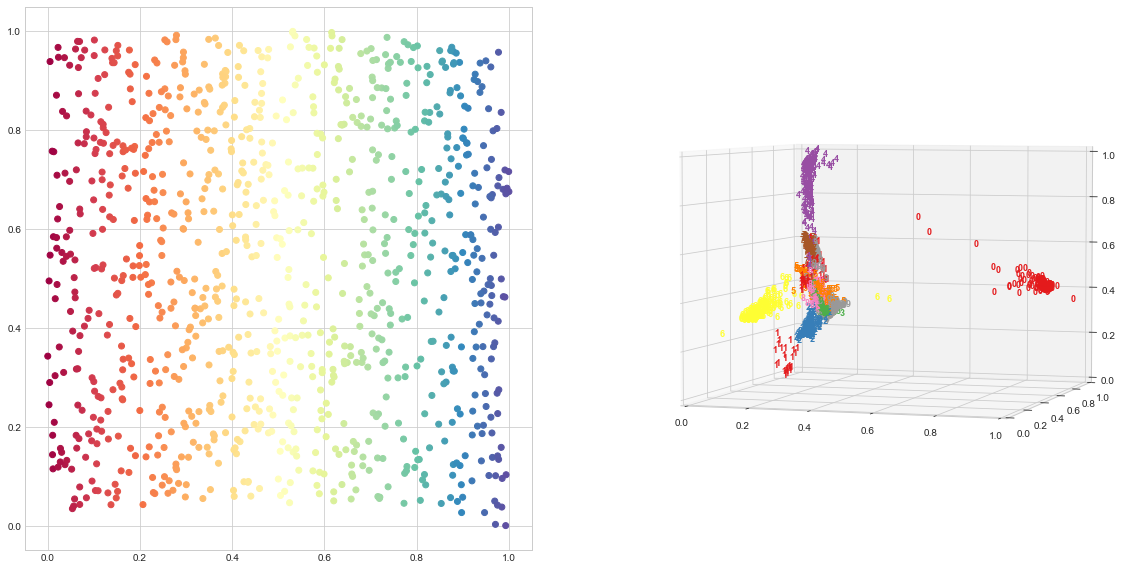

In [17]:
fig = plt.figure(figsize = (20, 10))
plot_s_curve(s_curve_ltsa, color, 121, '2d')
plot_digits(digits_ltsa, labels, 122, '3d')

## Hessian Eigenmapping

* LLE의 문제를 해결한 다른 방법
* 국소 선형 구조를 복원하기 위해 각 이웃에서 hessian 기반의 이차 형태를 중심으로 회전